# Signal Quality Prediction Model

## Domain
**Electronics and Telecommunication**

## Context
A communications equipment manufacturing company designs products responsible for emitting informative signals. The company aims to enhance its products' reliability and efficiency by predicting the signal quality using machine learning. This model will help in anticipating the performance of the equipment based on various measurable parameters.

## Data Description
The dataset contains results from numerous tests on the company's equipment, focusing on the following components:

- **Parameters**: This includes various measurable attributes and conditions under which the signal tests were performed. These parameters are crucial as they directly influence the signal's effectiveness and quality.

- **Signal_Quality**: This is the target variable, representing the final signal strength or quality derived from the tests. It is typically categorized into classes such as 'High', 'Medium', and 'Low', based on the signal's efficacy and clarity.

## Project Objective
The primary goal of this project is to develop a classifier that can accurately predict the signal quality from the given parameters. This machine learning model will enable the company to preemptively assess and improve the signal output of their equipment, thereby ensuring optimal performance.

### Steps to Achieve the Objective
1. **Data Collection**: Gather all relevant data regarding signal parameters and their corresponding quality assessments.
2. **Data Preprocessing**: Clean the dataset to handle missing values, outliers, and normalize data if required.
3. **Exploratory Data Analysis (EDA)**: Analyze the data to find patterns, trends, and correlations that can aid in feature selection and model building.
4. **Model Selection**: Choose appropriate machine learning models based on the problem type (classification) and the nature of the data.
5. **Model Training**: Train the models on the preprocessed data.
6. **Model Evaluation**: Evaluate the models using appropriate metrics to ensure reliability and accuracy in predicting signal quality.
7. **Model Optimization**: Fine-tune the models to achieve better accuracy.
8. **Deployment**: Deploy the model in a test environment to validate expected outcomes.

By following these steps, the company can significantly improve the predictability of signal quality, which is crucial for maintaining the reliability and efficiency of communications equipment.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#1. Data import and Understanding [10 Marks]


##A. Read the ‘Signals.csv’ as DataFrame and import required libraries. [2 Marks]

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder



# Path to your file (change the path to where your file is located)
file_path = '/content/drive/MyDrive/aiml /NN Project/Data/NN Project Data - Signal.csv'

# Load the dataset
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
print(data.head())


   Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
0          7.4         0.70         0.00          1.9        0.076   
1          7.8         0.88         0.00          2.6        0.098   
2          7.8         0.76         0.04          2.3        0.092   
3         11.2         0.28         0.56          1.9        0.075   
4          7.4         0.70         0.00          1.9        0.076   

   Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
0         11.0         34.0       0.9978         3.51          0.56   
1         25.0         67.0       0.9968         3.20          0.68   
2         15.0         54.0       0.9970         3.26          0.65   
3         17.0         60.0       0.9980         3.16          0.58   
4         11.0         34.0       0.9978         3.51          0.56   

   Parameter 11  Signal_Strength  
0           9.4                5  
1           9.8                5  
2           9.8                5  
3           

##B. Check for missing values and print percentage for each attribute. [2 Marks]

In [ ]:
missing_values = data.isnull().sum() / len(data) * 100
print("Percentage of missing values for each attribute:")
print(missing_values)


Percentage of missing values for each attribute:
Parameter 1        0.0
Parameter 2        0.0
Parameter 3        0.0
Parameter 4        0.0
Parameter 5        0.0
Parameter 6        0.0
Parameter 7        0.0
Parameter 8        0.0
Parameter 9        0.0
Parameter 10       0.0
Parameter 11       0.0
Signal_Strength    0.0
dtype: float64


##C. Check for presence of duplicate records in the dataset and impute with appropriate method. [2 Marks]

In [ ]:
duplicates = data.duplicated().sum()
print("Number of duplicate records:", duplicates)

# Removing duplicates if any
data = data.drop_duplicates()


Number of duplicate records: 240


##D. Visualise distribution of the target variable. [2 Marks]

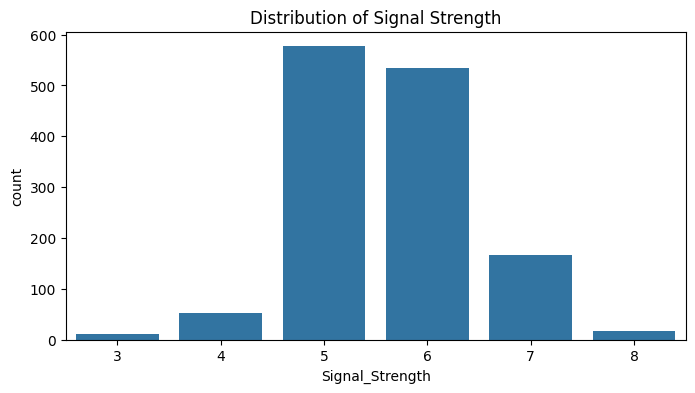

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(x='Signal_Strength', data=data)
plt.title('Distribution of Signal Strength')
plt.show()


##E. Share insights from the initial data analysis (at least 2). [2 Marks]

Summary statistics for each parameter:
                  count       mean        std      min      25%      50%  \
Parameter 1      1359.0   8.310596   1.736990  4.60000   7.1000   7.9000   
Parameter 2      1359.0   0.529478   0.183031  0.12000   0.3900   0.5200   
Parameter 3      1359.0   0.272333   0.195537  0.00000   0.0900   0.2600   
Parameter 4      1359.0   2.523400   1.352314  0.90000   1.9000   2.2000   
Parameter 5      1359.0   0.088124   0.049377  0.01200   0.0700   0.0790   
Parameter 6      1359.0  15.893304  10.447270  1.00000   7.0000  14.0000   
Parameter 7      1359.0  46.825975  33.408946  6.00000  22.0000  38.0000   
Parameter 8      1359.0   0.996709   0.001869  0.99007   0.9956   0.9967   
Parameter 9      1359.0   3.309787   0.155036  2.74000   3.2100   3.3100   
Parameter 10     1359.0   0.658705   0.170667  0.33000   0.5500   0.6200   
Parameter 11     1359.0  10.432315   1.082065  8.40000   9.5000  10.2000   
Signal_Strength  1359.0   5.623252   0.823578  3.

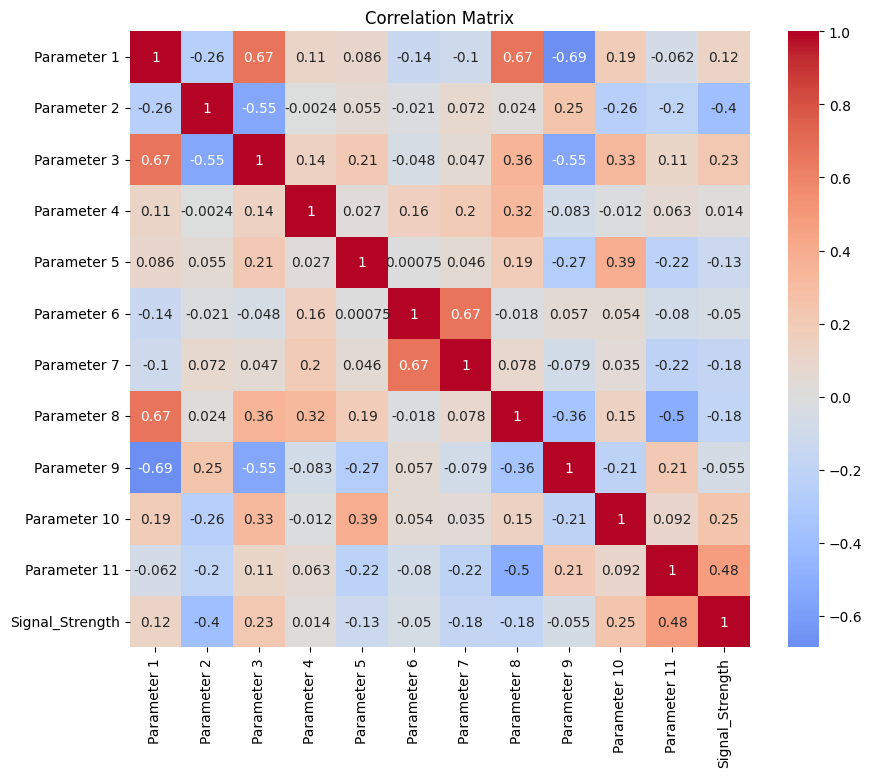

In [ ]:
# Here we would usually provide insights such as balance of classes, correlations etc.
print("Summary statistics for each parameter:")
print(data.describe().T)

# Calculate the correlation matrix
correlation = data.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
# 'coolwarm' is a diverging colormap: negative correlations are blue, positives are red
plt.title('Correlation Matrix')
plt.show()

###Insights

## Insights from Correlation Matrix and Summary Statistics

### Strong Positive Correlations:
- **Parameter 1 and Parameter 8**: There is a strong positive correlation of `0.67` between these parameters, suggesting a direct relationship where as one parameter increases, the other tends to also increase.
- **Parameter 6 and Parameter 7**: These parameters exhibit a strong positive correlation of `0.67`, indicating they are likely to increase in tandem.

### Strong Negative Correlations:
- **Parameter 9**: This parameter has a strong negative correlation with both **Parameter 1** (`-0.69`) and **Parameter 3** (`-0.55`). As Parameter 1 or Parameter 3 increases, Parameter 9 tends to decrease.

### Signal Strength Considerations:
- **Parameter 11**: Signal Strength shows a moderate positive correlation with Parameter 11 (`0.48`), suggesting that higher values of Parameter 11 are associated with stronger signal strength.
- **Parameter 1**: There is a slight negative correlation between Signal Strength and Parameter 1 (`-0.12`), though the relationship is relatively weak and may not indicate a strong predictive relationship.

### Parameter Distributions and Variability:
- **Parameter 6 and Parameter 7**: These parameters have the largest standard deviations, indicating the most variability within their measurements.
- **Parameter 8**: Exhibits a very tight distribution with a small standard deviation, suggesting that the values for this parameter are relatively stable across observations.
- **Signal Strength**: Has a standard deviation of `0.823578`, with minimum and maximum values of `3` and `8` respectively, indicating a bounded range of signal quality.


#2. Data preprocessing [7 Marks]

##A. Split the data into X & Y. [1 Marks]

In [ ]:
X = data.drop('Signal_Strength', axis=1)
Y = data['Signal_Strength']


##B. Split the data into train & test with 70:30 proportion.[1 Marks]

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


##C. Print shape of all the 4 variables and verify if train and test data is in sync. [1 Marks]

In [ ]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)


X_train shape: (951, 11)
X_test shape: (408, 11)
Y_train shape: (951,)
Y_test shape: (408,)


In [ ]:
import pandas as pd

# For training set
train_class_counts = Y_train.value_counts()
print("Class counts in the training set:")
print(train_class_counts)

# For test set
test_class_counts = Y_test.value_counts()
print("\nClass counts in the test set:")
print(test_class_counts)


Class counts in the training set:
Signal_Strength
5    405
6    371
7    117
4     40
8     13
3      5
Name: count, dtype: int64

Class counts in the test set:
Signal_Strength
5    172
6    164
7     50
4     13
3      5
8      4
Name: count, dtype: int64


In [ ]:
# Total number of instances in training set
total_train_instances = train_class_counts.sum()

# Total number of instances in test set
total_test_instances = test_class_counts.sum()

# Calculate proportions for training set
train_class_proportions = train_class_counts / total_train_instances

# Calculate proportions for test set
test_class_proportions = test_class_counts / total_test_instances

print("Class Proportions in Training Set:")
print(train_class_proportions)
print("\nClass Proportions in Test Set:")
print(test_class_proportions)


Class Proportions in Training Set:
Signal_Strength
5    0.425868
6    0.390116
7    0.123028
4    0.042061
8    0.013670
3    0.005258
Name: count, dtype: float64

Class Proportions in Test Set:
Signal_Strength
5    0.421569
6    0.401961
7    0.122549
4    0.031863
3    0.012255
8    0.009804
Name: count, dtype: float64


X_train has 951 samples with 11 features each.
X_test has 408 samples with 11 features each.
Y_train has 951 labels.
Y_test has 408 labels.
Based on these shapes, it looks like the datasets are in sync in terms of dimensionality:

The number of features in both the training and test sets is the same (11).
The number of labels in Y_train and Y_test matches the number of samples in X_train and X_test, respectively.

In [ ]:
assert X_train.shape[1] == X_test.shape[1], "Mismatch in number of features between training and test sets."
assert len(Y_train) == X_train.shape[0], "The number of labels does not match the number of samples in the training set."
assert len(Y_test) == X_test.shape[0], "The number of labels does not match the number of samples in the test set."
print("Train and test data are in sync.")


Train and test data are in sync.


##D. Normalise the train and test data with appropriate method. [2 Marks]

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


##E. Transform Labels into format acceptable by Neural Network [2 Marks]

In [ ]:
from sklearn.preprocessing import LabelBinarizer

# Initialize LabelBinarizer
label_binarizer = LabelBinarizer()

# Fit LabelBinarizer on the combined set of labels (train and test)
all_labels = pd.concat([Y_train, Y_test])
label_binarizer.fit(all_labels)

# Transform training labels to one-hot encoded format
Y_train_encoded = label_binarizer.transform(Y_train)

# Transform test labels to one-hot encoded format
Y_test_encoded = label_binarizer.transform(Y_test)


#3. Model Training & Evaluation using Neural Network [13 Marks]

##A. Design a Neural Network to train a classifier. [3 Marks]

In [ ]:
!pip install tensorflow==2.2.0


ERROR: Could not find a version that satisfies the requirement tensorflow==2.2.0 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0, 2.15.0.post1, 2.15.1, 2.16.0rc0, 2.16.1)
ERROR: No matching distribution found for tensorflow==2.2.0


In [ ]:
Y_train.shape[0]

951

In [ ]:
X_train.shape[1]

11

In [ ]:
num_classes = len(pd.unique(Y_train))
num_classes

6

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the number of input features
input_dim = X_train.shape[1]

# Define the number of classes
num_classes = len(pd.unique(Y_train))
# Initialize a Sequential model
model = Sequential()

# Add the input layer
model.add(Dense(64, input_dim=input_dim, activation='relu'))  # 64 neurons, 'relu' activation

# Add one or more hidden layers
model.add(Dense(32, activation='relu'))  # 32 neurons, 'relu' activation

# Add the output layer
model.add(Dense(num_classes, activation='softmax'))  # Output layer with softmax activation for multiclass classification

# Compile the model
model.compile(loss='categorical_crossentropy',  # Cross-entropy loss function
              optimizer='adam',  # Adam optimizer
              metrics=['accuracy'])  # Evaluation metric

# Print the model summary
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 64)                768       
                                                                 
 dense_14 (Dense)            (None, 32)                2080      
                                                                 
 dense_15 (Dense)            (None, 6)                 198       
                                                                 
Total params: 3046 (11.90 KB)
Trainable params: 3046 (11.90 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


##B. Train the classifier using previously designed Architecture [2 Marks]

In [ ]:
# Train the classifier
history = model.fit(X_train, Y_train_encoded,
                    epochs=100,  # Number of training epochs
                    batch_size=128,  # Batch size
                    validation_data=(X_test, Y_test_encoded))  # Validation data

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, Y_test_encoded)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


Epoch 1/100
8/8 [==============================] - 1s 36ms/step - loss: 4.6832 - accuracy: 0.4006 - val_loss: 2.6667 - val_accuracy: 0.3064
Epoch 2/100
8/8 [==============================] - 0s 7ms/step - loss: 2.5552 - accuracy: 0.3554 - val_loss: 1.7580 - val_accuracy: 0.4559
Epoch 3/100
8/8 [==============================] - 0s 9ms/step - loss: 1.9251 - accuracy: 0.4669 - val_loss: 1.6849 - val_accuracy: 0.4412
Epoch 4/100
8/8 [==============================] - 0s 10ms/step - loss: 1.6875 - accuracy: 0.4816 - val_loss: 1.5452 - val_accuracy: 0.4902
Epoch 5/100
8/8 [==============================] - 0s 19ms/step - loss: 1.5870 - accuracy: 0.4658 - val_loss: 1.4207 - val_accuracy: 0.5172
Epoch 6/100
8/8 [==============================] - 0s 32ms/step - loss: 1.4845 - accuracy: 0.4932 - val_loss: 1.3749 - val_accuracy: 0.5074
Epoch 7/100
8/8 [==============================] - 0s 38ms/step - loss: 1.4136 - accuracy: 0.4984 - val_loss: 1.3288 - val_accuracy: 0.4951
Epoch 8/100
8/8 [=====

##C. Plot 2 separate visuals. [3 Marks]

###i. Training Loss and Validation Loss

###ii. Training Accuracy and Validation Accuracy

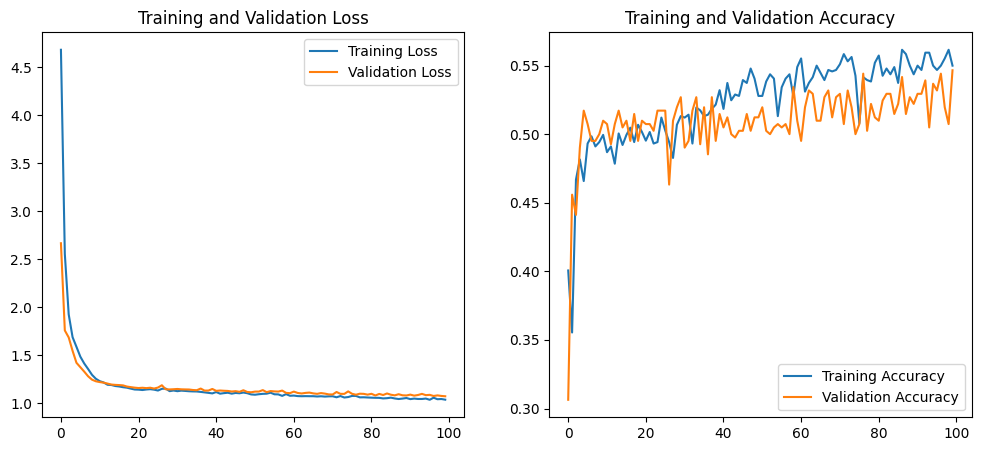

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()


##D. Design new architecture/update existing architecture in attempt to improve the performance of the model. [2 Marks]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

# Function to create the neural network model
def create_model2(hidden_layers=4, neurons=128, dropout_rate=0.5):
    model = Sequential()
    model.add(Dense(neurons, input_dim=input_dim, activation='relu'))
    model.add(BatchNormalization())  # Adding BatchNormalization layer
    model.add(Dropout(dropout_rate))  # Adding Dropout layer
    for _ in range(hidden_layers - 1):
        model.add(Dense(neurons, activation='relu'))
        model.add(BatchNormalization())  # Adding BatchNormalization layer
        model.add(Dropout(dropout_rate))  # Adding Dropout layer
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',  # Using Adam optimizer
                  metrics=['accuracy'])
    return model

# Create Keras model with modified architecture (model2)
model2 = create_model2()

# Train the model and evaluate performance
history2 = model2.fit(X_train, Y_train_encoded, epochs=100, batch_size=64, validation_data=(X_test, Y_test_encoded))

# Evaluate model on test data
test_loss, test_accuracy = model2.evaluate(X_test, Y_test_encoded)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Epoch 1/100
15/15 [==============================] - 3s 32ms/step - loss: 2.7799 - accuracy: 0.1609 - val_loss: 1.9471 - val_accuracy: 0.4314
Epoch 2/100
15/15 [==============================] - 0s 9ms/step - loss: 2.4254 - accuracy: 0.2124 - val_loss: 1.8873 - val_accuracy: 0.4363
Epoch 3/100
15/15 [==============================] - 0s 10ms/step - loss: 2.2310 - accuracy: 0.2419 - val_loss: 1.6861 - val_accuracy: 0.4755
Epoch 4/100
15/15 [==============================] - 0s 9ms/step - loss: 2.0771 - accuracy: 0.3113 - val_loss: 1.5572 - val_accuracy: 0.5049
Epoch 5/100
15/15 [==============================] - 0s 9ms/step - loss: 1.9968 - accuracy: 0.3102 - val_loss: 1.5541 - val_accuracy: 0.5049
Epoch 6/100
15/15 [==============================] - 0s 10ms/step - loss: 1.9198 - accuracy: 0.3144 - val_loss: 1.5294 - val_accuracy: 0.5221
Epoch 7/100
15/15 [==============================] - 0s 10ms/step - loss: 1.8287 - accuracy: 0.3502 - val_loss: 1.5308 - val_accuracy: 0.5221
Epoch 8/1

In [ ]:
'''from keras.optimizers import SGD

model2.compile(optimizer=SGD(learning_rate=0.001),
               loss='binary_crossentropy',
               metrics=['accuracy'])
'''


"from keras.optimizers import SGD\n\nmodel2.compile(optimizer=SGD(learning_rate=0.001),\n               loss='binary_crossentropy',\n               metrics=['accuracy'])\n"

##E. Plot visuals as in Q3.C and share insights about difference observed in both the models. [3 Marks]

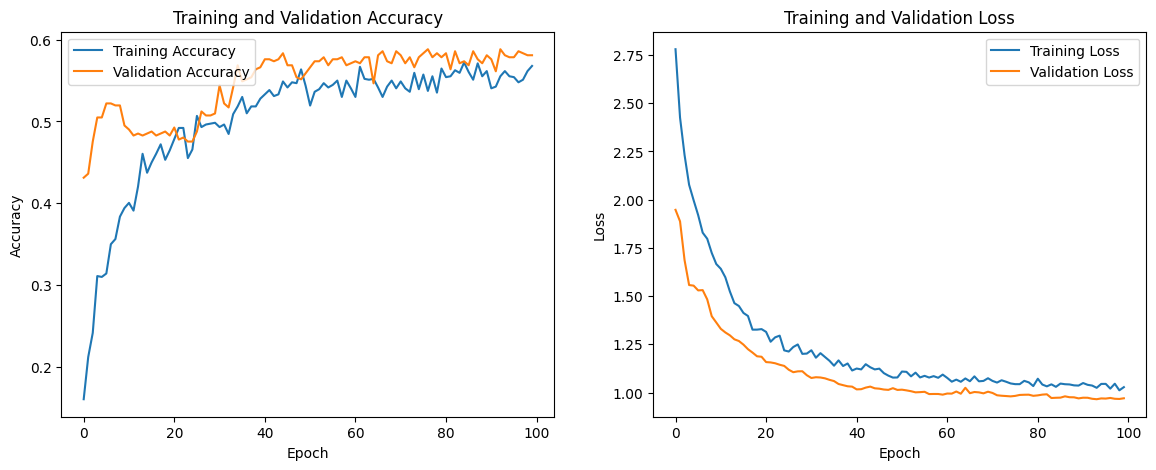

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))

# Subplot for the accuracy
plt.subplot(1, 2, 1)
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Subplot for the loss
plt.subplot(1, 2, 2)
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.show()


## Model Training Observations and Insights

### Loss Graphs Analysis:
- Both models demonstrate a decrease in training and validation losses as epochs progress, which is indicative of learning.
- Validation loss closely follows the training loss in both models, suggesting good generalization without significant overfitting.
- The first graph shows higher loss values compared to the second, suggesting that the model represented in the second graph might be performing better in fitting the data.

### Accuracy Graphs Analysis:
- Training accuracy is consistently higher than validation accuracy in both models. This is a common occurrence as models are optimized for the data they are trained on.
- The first graph displays more fluctuation in validation accuracy, implying potential instability in the model's learning process or a need for hyperparameter tuning.
- The second graph exhibits a smoother and more stable improvement in accuracy, which is usually indicative of a better learning process.

### Model Comparison:
- The model related to the second graph seems to be outperforming the one related to the first graph, with lower loss and higher accuracy.
- Both models seem to plateau below 60% accuracy, which might indicate either the complexity of the data being challenging or the models' architectures not being optimal for the task.

### Recommendations for Improvement:
- Addressing the early plateau in accuracy might require techniques to reduce overfitting, such as introducing more dropout, implementing regularization, or simplifying the model architecture.
- Experimenting with different model architectures, activation functions (e.g., leaky ReLU, ELU), and hyperparameters could yield better results.
- Optimize the learning rate; an inadequate learning rate can lead to suboptimal convergence or overly long training times without real benefit.
- Employ cross-validation to get a more robust assessment of the model's performance.
- Investigate the data for potential issues like class imbalance or insufficient feature representation and address these where possible.

These observations should guide further experimentation to improve the model's performance, potentially achieving higher accuracy and better generalization.
